0.9710958130573218,
0.9758682314555703,
0.980265347663151,
0.9857947449923257,
0.9904454952281252,
0.9952225840649775,
0,
0.994971147320893,
0.9899426761494643,
0.9857947449923257,
0.9803909975981517,
0.9756170075452915,
0.9710958130573218,


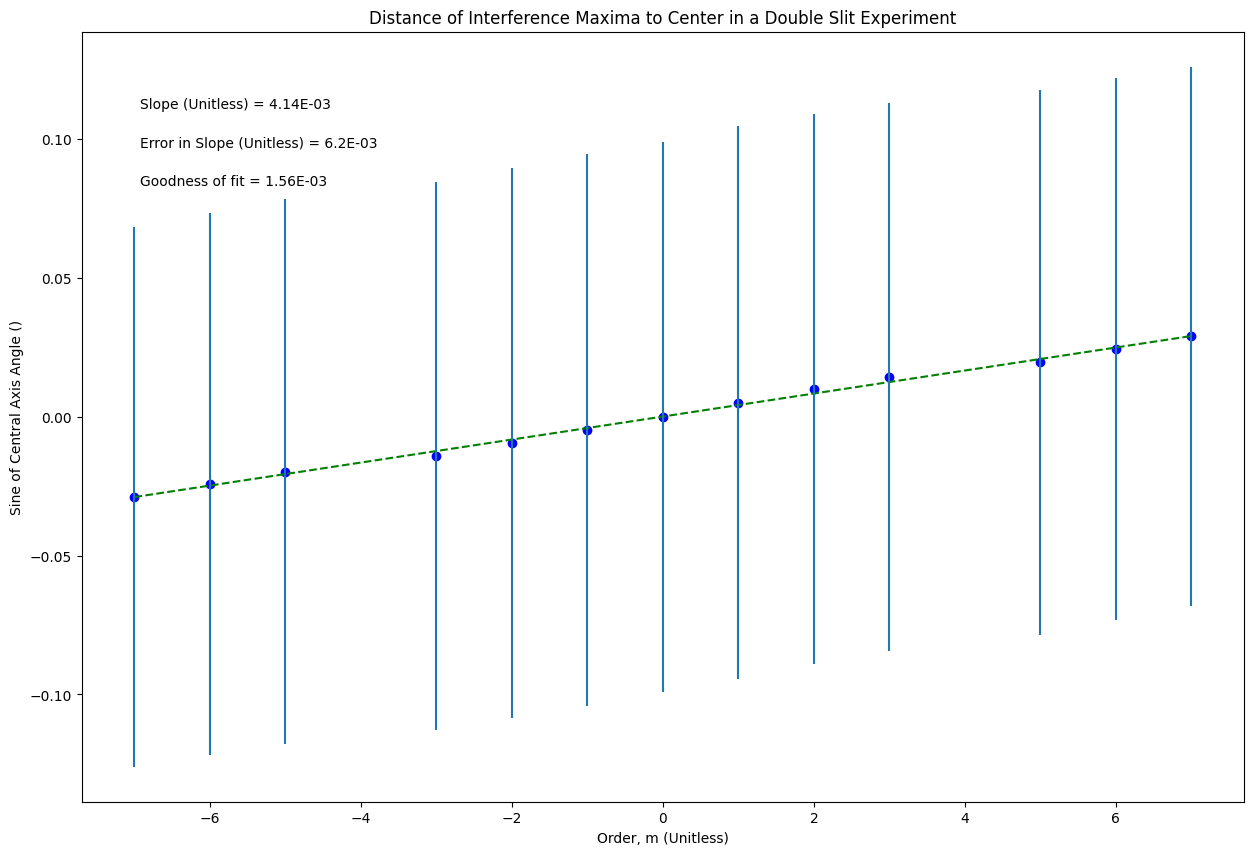

In [20]:
#PHSX 216 & 218 plotting code
#Brianna Beller
#Updated February 2023

#import packages and libraries, assign shortcut names
%matplotlib inline
from __future__ import division #only used if running python 2
import numpy as np
import matplotlib.pyplot as plt
import math as m

def toSineAngle(y: float) -> float:
    # Quick little func so I don't have to convert values manually for every array point
    # Derived from pg 2, eq. 4 : tan(theta) = y/L
    # It's also worth noting that input y values are assumed to be in cm, as that's what I recorded in.
    sineAngle = m.sin( m.atan( (y*(10**7))/(3.977*(10**9)) ) )
    return sineAngle

def toSineAngleERR(y: float) -> float:
    # I wrote the last one, might aswell do this one too
    # Uses Rule 4 into Brute force twice for arctan and sine
    a     = y*(10**7)
    deltA = .1*(10**7)
    b     = (3.977*(10**9))**(-1)
    deltB = 1*(10**7)
    r4    = m.sqrt( (deltA/a)**2 + ((deltB/b))**2 ) * abs((a*b))
    bf1   = abs(m.atan(a*b) - m.atan(a*b + r4))
    bf2   = abs(m.sin(m.atan(a*b)) - m.sin(m.atan(a*b) + bf1))
    err   = bf2
    return err

#-----------------------------------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations.
#CHANGE THE VARIABLE NAMES and numbers to match your data

#sinAng = [toSineAngleERR(11.5), toSineAngleERR(9.6), toSineAngleERR(7.85), toSineAngleERR(5.65), toSineAngleERR(3.8), toSineAngleERR(1.9),
#          0,
#          toSineAngleERR(2), toSineAngleERR(4), toSineAngleERR(5.65), toSineAngleERR(7.8), toSineAngleERR(9.7), toSineAngleERR(11.5)]
#for i in range(len(sinAng)):
#    val = sinAng[i]
#    print(f"{val},")

# Used that to find all my sin values. It's not used further but I'm leaving it for preservation's sake
order = np.array([-7,-6,-5,
              -3,-2,-1, 
               0, 
               1, 2, 3, 
               5, 6, 7]) #what are units?

sineTheta = np.array([
-0.02890418694267812,-0.024131768544429655,
-0.019734652336849044,-0.014205255007674352,
-0.009554504771874856,-0.004777415935022415,
0.0,
0.005028852679106969,0.010057323850535668,
0.014205255007674352,0.01960900240184824,
0.024382992454708537,0.02890418694267812,]) #what are units?

#-----------------------------------------------------------------------#
#Create array for uncertainties in y variable
#CHANGE THE VARIABLE NAME and numbers to match your data 

errSine = np.array([
0.09710958130573218,0.09758682314555703,
0.0980265347663151,0.09857947449923257,
0.09904454952281252,0.09952225840649775,
0.099044,
0.0994971147320893,0.09899426761494643,
0.09857947449923257,0.09803909975981517,
0.09756170075452915,0.09710958130573218,
])

#-----------------------------------------------------------------------#
#--------------------------Plotting Code Below--------------------------#
#-----------------------------------------------------------------------#

#UPDATE THIS SECTION!!!

#Re-assign variables as x, y, dy so that the remaining plotting code may remain generic
x = order             #this should be the array you want to plot on the x axis
y = sineTheta             #this should be the array you want to plot on the y axis
dy = errSine        #this should be your error in y array


#update each of these 4 strings
plot_title= 'Distance of Interference Maxima to Center in a Double Slit Experiment'
x_label= 'Order, m (Unitless)'
y_label= 'Sine of Central Axis Angle ()'
slope_units= 'Unitless'

#update annotation placement with integer from 1 to 4, top R corner is 1 (counter-clockwise from there)
annotation_placement=2 


#-----------------------------------------------------------------------#
#Don't need to change anything in this section!

#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" using linear least squares fitting
#(the closer to 0, the better the fit)
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#assign annotation positions based on annotation_placement value
if annotation_placement==2 or annotation_placement==3:
    xpos=0.05
elif annotation_placement==1 or annotation_placement==4:
    xpos=0.75

if annotation_placement==1 or annotation_placement==2:
    ypos=[.9,.85,.8]
elif annotation_placement==3 or annotation_placement==4:
    ypos=[.2,.15,.1]
    
#-----------------------------------------------------------------------#
#Don't need to change anything in this section!

#Plot data on graph. Plot error bars and place values for slope, 
#error in slope and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope ({}) = {value:.{digits}E}'.format(slope_units,value=m, digits=2),
             (xpos, ypos[0]), xycoords='axes fraction')
 
plt.annotate('Error in Slope ({}) = {value:.{digits}E}'.format(slope_units,value=dm, digits=1),
             (xpos, ypos[1]), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (xpos, ypos[2]), xycoords='axes fraction')

plt.show()